# Подключение библиотек и определение глобальных переменных

In [ ]:
import requests
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    log_loss, 
    precision_recall_curve, 
    roc_curve
)

import matplotlib.pyplot as plt

**Определяем гробальные переменные и задаем настройки библиотек:**
- LOW_DEPTH - глубина мелкого дерева
- HIGH_DEPTH - глубина глубокого дерева

---

In [ ]:
LOW_DEPTH = 5
HIGH_DEPTH = 30
plt.style.use('ggplot')

# Задание 1: Загрузить данные

**Загружаем данные**

---

In [ ]:
data_url = requests.get('https://raw.githubusercontent.com/sikoraaxd/Homework/main/datasets/bioresponce.csv')
with open('data.csv', 'w') as f:
  f.write(data_url.content.decode('utf-8'))

data = pd.read_csv('data.csv')
data

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,...,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,...,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,...,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,...,0,0,0,0,0,0,0,0,0,0


**Делим данные на тренировочную и тестовую выборки**

---

In [ ]:
X, y = data.iloc[:, 1:], data.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17, test_size=0.33, shuffle=True)

X_train.shape, y_train.shape

((2513, 1776), (2513,))

# Задание 2: Обучить 4 классификатора, чтобы предсказать поле Activity

**Определяем классификаторы:**

---

* Мелкое дерево принятия решений
*   Глубокое дерево принятия решений
*   Случайный лес на мелких деревьях принятия решений
*   Случайный лес на глубоких деревьях принятия решений

---

In [ ]:
models = [DecisionTreeClassifier(random_state=17, max_depth=LOW_DEPTH),
          DecisionTreeClassifier(random_state=17, max_depth=HIGH_DEPTH),
          RandomForestClassifier(random_state=17, max_depth=LOW_DEPTH),
          RandomForestClassifier(random_state=17, max_depth=HIGH_DEPTH)]

for model in models: 
  model.fit(X_train, y_train)

**Делаем прогнозы**

---

In [ ]:
predictions = []

for model in models:
  predictions.append(model.predict(X_test))

# Задание 3: Для моделей рассчитать метрики:


*   доля правильных ответов (accuracy)
*   точность (precision)
*   полнота (recall)
*   F1-score
*   log-loss



**Рассчитываем и выводим метрики качества для каждого классификатора**

---

In [ ]:
metrics = []

for predict in predictions:
  accuracy  = accuracy_score(y_test, predict)
  precision = precision_score(y_test, predict)
  recall    = recall_score(y_test, predict)
  f1        = f1_score(y_test, predict)
  logl      = log_loss(y_test, predict)

  metrics.append([accuracy, precision, recall, f1, logl])

metrics_data = {
    'Мелкое дерево':            metrics[0],
    'Глубокое дерево':          metrics[1],
    'Лес на мелких деревьях':   metrics[2],
    'Лес на глубоких деревьях': metrics[3]
}

metrics_df = pd.DataFrame(metrics_data, index=['accuracy', 'precision', 'recall', 'f1-score', 'log loss'])
metrics_df

,Мелкое дерево,Глубокое дерево,Лес на мелких деревьях,Лес на глубоких деревьях
accuracy,0.767367,0.713247,0.736672,0.803716
precision,0.790840,0.743034,0.752577,0.822727
recall,0.774290,0.717489,0.763827,0.811659
f1-score,0.782477,0.730038,0.758160,0.817156
log loss,8.034957,9.904199,9.095134,6.779496


# Задание 4: Построить графики precision-recall и ROC-кривых для моделей

**Получаем данные для построения precision-recall и ROC-кривых**

---

In [ ]:
pr_curves = []
roc_curves = []

for model in models:
  y_score = model.predict_proba(X_test)[:, 1]

  precision, recall, _ = precision_recall_curve(y_test, y_score)
  fpr, trp, _ = roc_curve(y_test, y_score)

  pr_curves.append({'precision': precision, 'recall':recall})
  roc_curves.append({'fpr': fpr, 'tpr':trp})

**Выводим графики**

---

1) precision-recall кривые

---

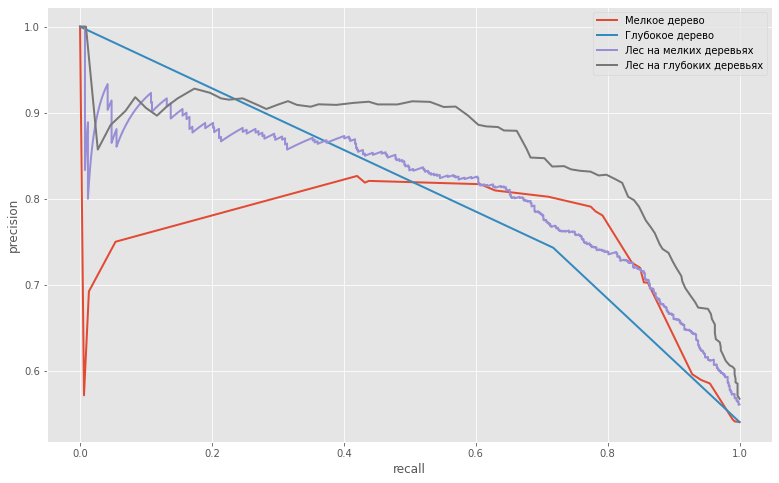

In [ ]:
plt.figure(figsize=(13,8)) 
plt.rcParams['lines.linewidth'] = 2
plt.plot(pr_curves[0]['recall'], pr_curves[0]['precision'], label='Мелкое дерево')
plt.plot(pr_curves[1]['recall'], pr_curves[1]['precision'], label='Глубокое дерево')
plt.plot(pr_curves[2]['recall'], pr_curves[2]['precision'], label='Лес на мелких деревьях')
plt.plot(pr_curves[3]['recall'], pr_curves[3]['precision'], label='Лес на глубоких деревьях')
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend()
plt.show()

2) ROC-кривые

---

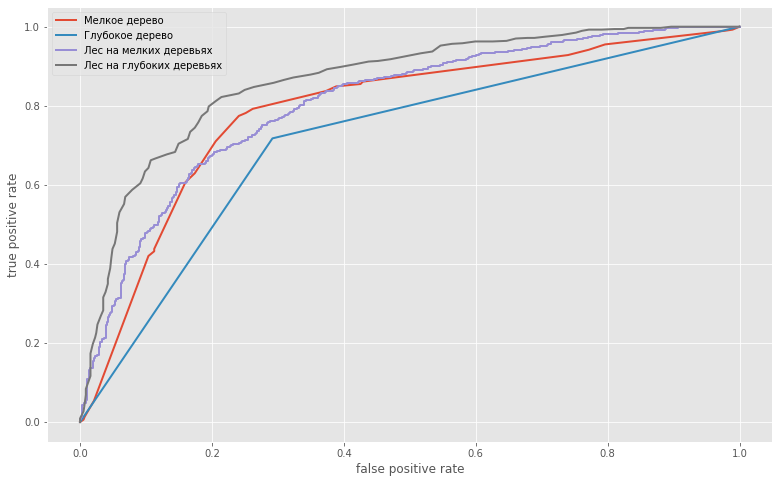

In [ ]:
plt.figure(figsize=(13,8)) 
plt.rcParams['lines.linewidth'] = 2
plt.plot(roc_curves[0]['fpr'], roc_curves[0]['tpr'], label='Мелкое дерево')
plt.plot(roc_curves[1]['fpr'], roc_curves[1]['tpr'], label='Глубокое дерево')
plt.plot(roc_curves[2]['fpr'], roc_curves[2]['tpr'], label='Лес на мелких деревьях')
plt.plot(roc_curves[3]['fpr'], roc_curves[3]['tpr'], label='Лес на глубоких деревьях')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.show()

# Задание 5: Обучить классификатор, который избегает ошибок второго рода и рассчитать для него метрики качества.

**Создаём класс класификатора, который будет давать прогнозы, максимизирующие recall метрику**

---

In [ ]:
class RecallClassifier:
  def __init__(self, treshold=0.3):
    self.classifier = RandomForestClassifier(random_state=17, max_depth=HIGH_DEPTH)
    self.treshold = treshold

  def fit(self, X, y):
    self.classifier.fit(X, y)
  
  def predict(self, X):
    return np.array(self.classifier.predict_proba(X)[:, 1]>=self.treshold, dtype=np.int64) 

**Делаем прогнозы и выводим метрики качества**

---

In [ ]:
recall_classifier = RecallClassifier()
recall_classifier.fit(X_train, y_train)
recall_classifier_predicts = recall_classifier.predict(X_test)

recall_classifier_metrics = []
recall_classifier_metrics.append(accuracy_score(y_test, recall_classifier_predicts))
recall_classifier_metrics.append(precision_score(y_test, recall_classifier_predicts))
recall_classifier_metrics.append(recall_score(y_test, recall_classifier_predicts))
recall_classifier_metrics.append(f1_score(y_test, recall_classifier_predicts))
recall_classifier_metrics.append(log_loss(y_test, recall_classifier_predicts))

recall_classifier_metrics_df = pd.DataFrame({'Классификатор, избегающий ошибок 2 рода': recall_classifier_metrics}, index=['accuracy', 'precision', 'recall', 'f1-score', 'log loss'])
recall_classifier_metrics_df

,"Классификатор, избегающий ошибок 2 рода"
accuracy,0.710824
precision,0.660144
recall,0.958146
f1-score,0.781707
log loss,9.988001
